In [1]:
# Import our packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

<ipython-input-2-d833b9a257c0>:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-d833b9a257c0>:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [3]:
df= pd.read_csv('Data_Professional_Salary_Survey_Responses.csv')
df.rename(columns={' SalaryUSD ': 'SalaryUSD'}, inplace=True)
#show the first 5 rows
df.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2021,12/10/2020 8:22:43,"65,000",Sweden,NaN,Microsoft SQL Server,4,Microsoft SQL Server,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",...,SQL Server 2016,SQL Server 2016,"<= 20,000 (town)",Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
1,2021,12/10/2020 8:23:22,"145,000",United States,76063,Microsoft SQL Server,15,Azure SQL DB (any flavor),Full time employee,DBA (Production Focus - build & troubleshoot s...,...,SQL Server 2019,SQL Server 2014,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
2,2021,12/10/2020 8:23:38,"105,000",United States,43240,Microsoft SQL Server,12,"PostgreSQL, Azure SQL DB (any flavor)",Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2017,SQL Server 2008R2,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
3,2021,12/10/2020 8:23:48,"46,482",United Kingdom,NaN,Microsoft SQL Server,10,Azure SQL DB (any flavor),Full time employee,DBA (Production Focus - build & troubleshoot s...,...,SQL Server 2019,SQL Server 2012,300K-1M (large city),"Education (K-12, college, university)",Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
4,2021,12/10/2020 8:24:04,"98,800",United States,468,Microsoft SQL Server,5,DB2,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",...,SQL Server 2019,SQL Server 2012,100K-299K (city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1


In [4]:
df.shape

(10341, 31)

## Determine how many missing values are present in each column

In [5]:
# replacing missing values with np.nan
missing_val = ['Not Asked']
df.replace(missing_val, np.nan, inplace = True)

In [6]:
# Look at total NaN values per column
df.isnull().sum()

Survey Year                                0
Timestamp                                  0
SalaryUSD                                  0
Country                                    0
PostalCode                              4701
PrimaryDatabase                            0
YearsWithThisDatabase                      0
OtherDatabases                          1944
EmploymentStatus                           0
JobTitle                                   0
ManageStaff                                0
YearsWithThisTypeOfJob                     0
HowManyCompanies                        5992
OtherPeopleOnYourTeam                      0
CompanyEmployeesOverall                 7715
DatabaseServers                         1747
Education                               3470
EducationIsComputerRelated              4682
Certifications                          3470
HoursWorkedPerWeek                      3470
TelecommuteDaysPerWeek                  3470
NewestVersionInProduction               6885
OldestVers

In [7]:
df.isnull().sum().sum()

83247

## Remove columns that contains NaN more than 30%

In [8]:
df=df.drop(['PostalCode', 'HowManyCompanies', 'CompanyEmployeesOverall', 'Education', 'EducationIsComputerRelated', 
'Certifications', 'HoursWorkedPerWeek', 'TelecommuteDaysPerWeek', 'NewestVersionInProduction', 'OldestVersionInProduction',
'PopulationOfLargestCityWithin20Miles', 'OtherJobDuties', 'KindsOfTasksPerformed', 'LookingForAnotherJob'], axis = 1)

In [9]:
df.isnull().sum()

Survey Year                  0
Timestamp                    0
SalaryUSD                    0
Country                      0
PrimaryDatabase              0
YearsWithThisDatabase        0
OtherDatabases            1944
EmploymentStatus             0
JobTitle                     0
ManageStaff                  0
YearsWithThisTypeOfJob       0
OtherPeopleOnYourTeam        0
DatabaseServers           1747
EmploymentSector             0
CareerPlansThisYear       2898
Gender                    2898
Counter                      0
dtype: int64

## Fill nulls values

In [10]:
df['OtherDatabases'] = df['OtherDatabases'].fillna(df['OtherDatabases'].mode()[0])
df['DatabaseServers'] = df['DatabaseServers'].fillna(df['DatabaseServers'].mode()[0])
df['CareerPlansThisYear'] = df['CareerPlansThisYear'].fillna(df['CareerPlansThisYear'].mode()[0])
# We can't fill the Gender by mode. We assume that it is Unknown
df['Gender'] = df['Gender'].fillna('Unknown')
#df['Gender'] = df['Gender'].fillna('None')


## Career Plans for each YEAR

In [11]:
df['CareerPlansThisYear'].value_counts()

Stay with the same employer, same role            7422
Stay with the same employer,  but change roles     864
Stay with the same role, but change employers      848
Prefer not to say                                  609
Change both employers and roles                    598
Name: CareerPlansThisYear, dtype: int64

In [12]:
df['Survey Year'].value_counts()

2018    3094
2017    2898
2021    1747
2020    1723
2019     879
Name: Survey Year, dtype: int64

In [13]:
#Employment Sector by each year
dfCareerPlan = df.groupby(['CareerPlansThisYear', 'Survey Year'])\
                     .size()\
                     .unstack("Survey Year")\
                     

# Filling null values with 0
dfCareerPlan.fillna(value = 0, inplace = True)

# Total for each year for the 'Employment Sector'
dfCareerPlan["sum"] = dfCareerPlan.iloc[:,1:].apply(lambda x: sum(x), axis=1)

# View the data
dfCareerPlan

Survey Year,2017,2018,2019,2020,2021,sum
CareerPlansThisYear,,,,,,
Change both employers and roles,0.0,237.0,56.0,156.0,149.0,598.0
Prefer not to say,0.0,270.0,75.0,136.0,128.0,609.0
"Stay with the same employer, but change roles",0.0,377.0,106.0,201.0,180.0,864.0
"Stay with the same employer, same role",2898.0,1852.0,532.0,1029.0,1111.0,4524.0
"Stay with the same role, but change employers",0.0,358.0,110.0,201.0,179.0,848.0


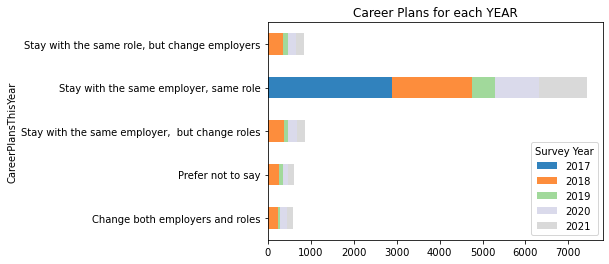

In [14]:
# Plot

# dfPlan
dfCareerPlan.drop("sum", axis=1).plot(kind="barh", colormap='tab20c', 
                                stacked=True, title="Career Plans for each YEAR")
plt.show();

In [15]:
dfCareerPlan

Survey Year,2017,2018,2019,2020,2021,sum
CareerPlansThisYear,,,,,,
Change both employers and roles,0.0,237.0,56.0,156.0,149.0,598.0
Prefer not to say,0.0,270.0,75.0,136.0,128.0,609.0
"Stay with the same employer, but change roles",0.0,377.0,106.0,201.0,180.0,864.0
"Stay with the same employer, same role",2898.0,1852.0,532.0,1029.0,1111.0,4524.0
"Stay with the same role, but change employers",0.0,358.0,110.0,201.0,179.0,848.0


## Dashboard

In [16]:
# Build App
app = JupyterDash(__name__)

app.layout = html.Div([
                       
                       html.H1("Our Dashboard"),

                       html.Label('Slider for a year'),
                       dcc.Slider(
                                id = "slide",
                                min=2017,
                                max=2021,
                                step=None,
                                marks={
                                     2017: '2017',
                                     2018: '2018',
                                     2019: '2019',
                                     2020: '2020',
                                     2021: '2021',
                                        0: 'ALL',
                                     },  
                                value= -1,
                             ), 
                       html.Br([]),
                       dcc.Graph(id="careerPlans"),
])

@app.callback(
    Output('careerPlans', 'figure'),
    [Input("slide", "value"),]
)

def update_figure(val_slide):

    dataPlan = dfCareerPlan

    if (val_slide != -1):
        dataPlan = dataPlan[dataPlan["Survey Year"].isin(val_slide)]
    else:
        dataPlan = dataPlan[dataPlan["Survey Year"]]
        

    dataPlan = dataPlan.reset_index()

    F = px.bar(dataPlan, x="sum", y="CareerPlansThisYear", title=" Careers plans for each year")
    return F



if __name__ == '__main__':
    app.run_server(mode="inline", debug=False)



 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Dec/2021 22:57:05] "GET /_alive_35313755-f917-4de0-aeb4-56d2d0846500 HTTP/1.1" 200 -


In [17]:
dfCareerPlan = dfCareerPlan.reset_index()
dfCareerPlan

Survey Year,CareerPlansThisYear,2017,2018,2019,2020,2021,sum
0,Change both employers and roles,0.0,237.0,56.0,156.0,149.0,598.0
1,Prefer not to say,0.0,270.0,75.0,136.0,128.0,609.0
2,"Stay with the same employer, but change roles",0.0,377.0,106.0,201.0,180.0,864.0
3,"Stay with the same employer, same role",2898.0,1852.0,532.0,1029.0,1111.0,4524.0
4,"Stay with the same role, but change employers",0.0,358.0,110.0,201.0,179.0,848.0


In [18]:


F = px.bar(dfCareerPlan, x="sum", y="CareerPlansThisYear", title=" Careers plans for each year")
F.show()

127.0.0.1 - - [25/Dec/2021 22:57:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2021 22:57:06] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2021 22:57:06] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2021 22:57:06] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2021 22:57:06] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2021 22:57:06] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2021 22:57:08] "POST /_dash-update-component HTTP/1.1" 500 -


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
~/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc(
    self=Index(['CareerPlansThisYear', 2017, 2018, 2019, ...2021, 'sum'], dtype='object', name='Survey Year'),
    key='Survey Year',
    method=None,
    tolerance=None
)
   3079             try:
-> 3080                 return self._engine.get_loc(casted_key)
        self._engine.get_loc = <built-in method get_loc of pandas._libs.index.ObjectEngine object at 0x7f9696e30270>
        casted_key = 'Survey Year'
   3081             except KeyError as err:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObject